%timeit function  --> print the execution time

https://github.com/fastai/fastbook

In [1]:
!pip install -Uqq fastai
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
!pip install voila # run jupyter notebook
# jupyter serverextension enable --sys-prefix voila
!pip install jupyter_contrib_nbextensions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 37.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.0/130.0 kB 20.1 MB/s eta 0:00:00


In [5]:
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *
from fastbook import * 
from fastai.vision.widgets import *


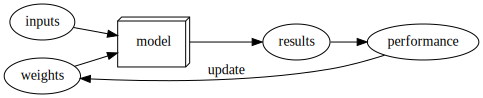

In [6]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model; results->performance
performance->weights[constraint=false label=update]''')

#### Gradio . streamlit, and Hugging face spaces for deployment
cleaner = ImageClassifierCleaner(learn)
SegmentationDataLoader()
learn.export()

In [7]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value=(), description='Upload')

When we have a variable that has many big numbers and many small number, it is better to normalize it by using log that makes it more evenly distributed. 

## How do we fit a function to data



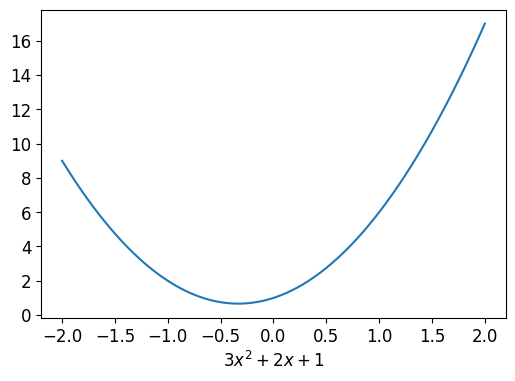

In [48]:
def plot_function(f, tx=None, ty=None, title=None, min=-2, max=2, figsize=(6,4)):
    x = torch.linspace(min,max, 100)
    fig,ax = plt.subplots(figsize=figsize)
    ax.plot(x,f(x))
    if tx is not None: ax.set_xlabel(tx)
    if ty is not None: ax.set_ylabel(ty)
    if title is not None: ax.set_title(title)
        
def f(x): return 3*x**2 + 2*x +1

plot_function(f, "$3x^2 + 2x + 1$")

In [49]:
def quad(a,b,c,x) : return a*x**2 + b*x + c

In [50]:
quad(3,2,1,1.5)

10.75

In [51]:
from functools import partial
def mk_quad(a,b,c): return partial(quad, a,b,c)

In [52]:
f1 = mk_quad(3,2,1)
f1(1.5)

10.75

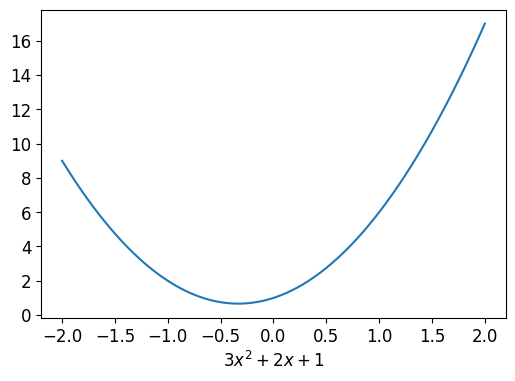

In [53]:
plot_function(f1, "$3x^2 + 2x + 1$")

In [54]:
from numpy.random import normal, seed, uniform
np.random.seed(4)

In [55]:
def noise(x, scale): return normal(scale=scale, size=x.shape)
def add_noise(x, mult, add): return x * (1+noise(x, mult)) + noise(x,add)

In [61]:
def mse(preds, acts): return ((preds-acts)**2).mean()

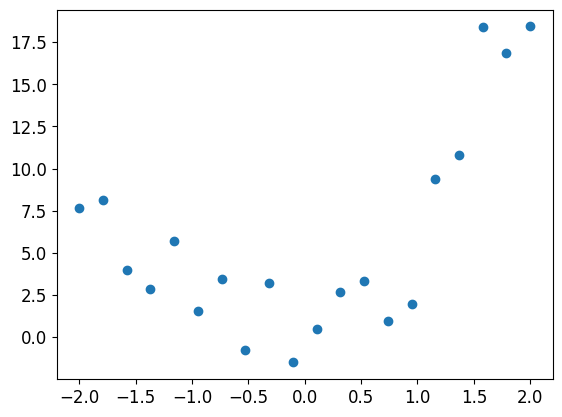

In [56]:
x = torch.linspace(-2,2, steps = 20)[:,None]
y = add_noise(f(x), 0.3, 1.5)
plt.scatter(x,y)

In [60]:
# !pip install -U ipywidgets

from ipywidgets import interact
@interact(a=1.5, b = 1.5, c=1.5)
def plot_quad(a,b,c):
    f= mk_quad(a,b,c)
    plt.scatter(x,y)
    loss= mse(f(x),y)
    plot_function(f,  f"MSE:{loss:.2f}")
    print(loss)

interactive(children=(FloatSlider(value=1.5, description='a', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

# Derivetive

Instead of manually optimizing the function we can use the derivative instead

In [62]:
def quad_mse(params):
    f = mk_quad(*params) # star means that expand the list into parameters to the function
    return mse(f(x),y)

In [64]:
quad_mse([1.5,1.5,1.5])

tensor(17.9853, dtype=torch.float64)

In [65]:
abc = torch.tensor([1.5, 1.5, 1.5])
abc.requires_grad_()  # calculate the gradient everytime you use abc

tensor([1.5000, 1.5000, 1.5000], requires_grad=True)

In [66]:
loss = quad_mse(abc) # abc is used, and therefore the gradient is calulated
loss

tensor(17.9853, dtype=torch.float64, grad_fn=<MeanBackward0>)

`grad_fn=<MeanBackward0>)` means that if we want pytorch knows how to calculate the gradients by calling this function. We can call backward() to actually calculate this.


In [67]:
loss.backward()

In [69]:
abc.grad

tensor([-13.1814,  -3.1525,  -4.3421])

negative value for "a" means that if increase "a", the loss goes down


Here we don't want to have the derivatives:

In [71]:
with torch.no_grad():
    abc -= abc.grad * 0.01 # 0.01 is probably the learning rate!?
    loss = quad_mse(abc)

print(f'loss= {loss:.2f}')

loss= 16.05


In [75]:
for i in range(5):
    loss = quad_mse(abc)
    loss.backward()
    with torch.no_grad(): abc -= abc.grad*0.01
    print(f'loss= {loss:.2f}')

loss= 7.21
loss= 9.70
loss= 12.92
loss= 15.74
loss= 17.15


The loss goes down (optimization)...
# ReLu (Rectified Linear)


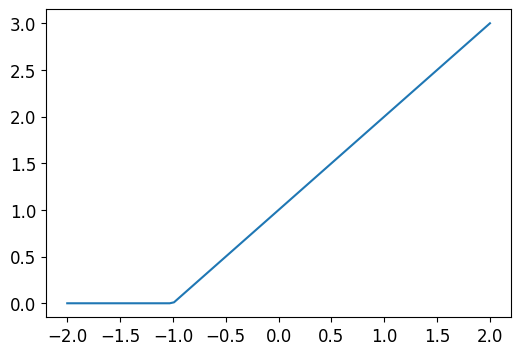

In [84]:

def rectified_linear(m,b,x):
    y = m*x +b
    return torch.clip(y, 0.)

plot_function(partial(rectified_linear, 1,1))

In [85]:
@interact(m=1.5, b = 1.5)
def plot_relu(m,b):
    plot_function(partial(rectified_linear, m,b))

interactive(children=(FloatSlider(value=1.5, description='m', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

We can stack up ReLus to build different shapes 

In [87]:
def double_relu(m1,b1, m2,b2,x):
    return rectified_linear(m1,b1,x)+rectified_linear(m2,b2,x)
@interact(m1=1.5, b1 = -1.5, m2=1.5, b2 = 1.5)
def plot_double_relu(m1,b1, m2,b2):
    plot_function(partial(double_relu, m1,b1, m2, b2))

interactive(children=(FloatSlider(value=1.5, description='m1', max=4.5, min=-1.5), FloatSlider(value=-1.5, des…